# Data Cleaning

## 1 Diagnose Data for Cleaning
### common data problems
- Inconsistent column names
- Missing data
- Outliers
- Duplicate rows
- Untidy
- Need to process columns
- Column types can signal unexpected data values

In [5]:
#example
import pandas as pd
df = pd.read_csv('zzz.csv')
print(df.head()) #first 5 rows
print(df.tail()) #last 5 rows
print(df.columns) # gives all column names
print(df.shape) # rows x columns
print(df.info()) # some additional info



       Job #  Doc #        Borough  House #                       Street Name  \
0  121577873      2      MANHATTAN      386  PARK AVENUE SOUTH                  
1  520129502      1  STATEN ISLAND      107  KNOX PLACE                         
2  121601560      1      MANHATTAN       63  WEST 131 STREET                    
3  121601203      1      MANHATTAN       48  WEST 25TH STREET                   
4  121601338      1      MANHATTAN       45  WEST 29 STREET                     

   Block  Lot    Bin # Job Type Job Status           ...            \
0    857   38  1016890       A2          D           ...             
1    342    1  5161350       A3          A           ...             
2   1729    9  1053831       A2          Q           ...             
3    826   69  1015610       A2          D           ...             
4    831    7  1015754       A3          D           ...             

                Owner's Last Name             Owner's Business Name  \
0  MIGLIORE          

In [ ]:
#example
### frequency counts - to get some analysis on columns
df.continent.value_counts(dropna=False) #dropna False helps to count even missing values
# anotherway
df.continent['value_counts'](dropna=False)
# if we have too many , we can chain head method to take a peek
df.continent['value_counts'](dropna=False).head()

# df.describe() -> gives us some statistical analysis of our data
df.describe()



In [7]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df.State.value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))


MANHATTAN        6
STATEN ISLAND    1
BROOKLYN         1
Name: Borough, dtype: int64
NY    8
Name: State, dtype: int64
NOT APPLICABLE                              5
NaN                                         3
Name: Site Fill, dtype: int64


#### Visualize basic summary statistics in the data
- outliers
- Min/Max
- 25th, 50th, 75th percentiles
#### we can observe with box plots to count discrete data and histograms to count continous data
#### scatter plots can help determine relation between two numeric values, to flag bad data



In [ ]:
# example
df.describe()
# plot histogram for continuous data
df.population.plot('hist')
# identify errors by filtering
df[df.population>100000000]

# plot histogram for discrete data
df.boxplot(column='population', by='continent')




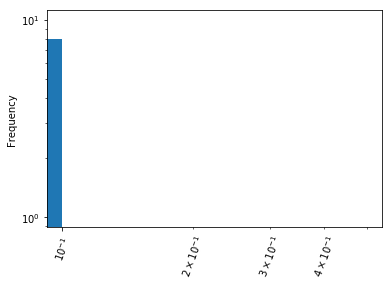

None


In [13]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt 

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)
# to rescale x axis & yaxis we can use logx and logy, rot is to rotate the axes
# Display the histogram
print(plt.show())


In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
a = df['Initial Cost'].str[1:]

df.boxplot(column='Initial Cost', by='Borough', rot=90)
print(df.columns)
print(type(a))

# Display the plot
plt.show()


In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

## 2 Tidy data

#### principles of tidy data
- columns represent seperate variables
- rows represent individual observations
- observational units form tables

### Melting
- sometimes we might need to melt two or more diff columns into one
- In pandas we have a function called melt

In [ ]:
# example
pd.melt(frame=df, id_vars="name", value_vars=['treatment a, treatment b'], var_name='treatment', value_name='result')

Print the head of airquality.
Use pd.melt() to melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows. Do this by using id_vars to specify the columns you do not wish to melt: 'Month' and 'Day'.
Print the head of airquality_melt.

In [53]:
# Print the head of airquality
airquality = pd.read_csv('airquality.csv')
print(airquality.head())

# Melt airquality: airquality_melt
#airquality_melt = pd.melt(frame='airquality', id_vars=['Month', 'Day'])
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())
print(airquality_melt.tail())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN
     Month  Day variable  value
607      9   26     Temp   70.0
608      9   27     Temp   77.0
609      9   28     Temp   75.0
610      9   29     Temp   76.0
611      9   30     Temp   68.0


This exercise demonstrates that melting a DataFrame is not always appropriate if you want to make it tidy. You may have to perform other transformations depending on how your data is represented.

You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter.

In [54]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())


   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


### Pivoting
oposite of melting
- melting : turn coluns into rows
- pivoting : turn unique values into seperate columns

In [ ]:
# example
weather_tidy = weather.pivot(index = "date", columns="element", values="value") 
# which column we want to fix during pivot, columns we pass column that we want to pivot into new columns, 
# values is the one which we want to put values into


In [ ]:
#### using pivot when we have duplicate values by pivot_table menthod
weather2_tidy = weather.pivot_table(values='value', index='date', columns='element', aggfunc=np.mean)
##### aggfunc method to tell how to handle the duplicate values

In [56]:
# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())


   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


Hierarchical indexes are covered in depth in Manipulating DataFrames with pandas. In essence, they allow you to group columns or rows by another variable - in this case, by 'Month' as well as 'Day'.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index(). Dan didn't show you how to use this method in the video, but you're now going to practice using it in this exercise to get back the original DataFrame from airquality_pivot, which has been pre-loaded.

In [58]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())


MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [ ]:
import numpy as np
# Pivot airquality_dup: airquality_pivot
airquality_pivot = airquality.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc='np.mean')

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())


In [63]:
tb=pd.read_csv('tb.csv')
# Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())


  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


In [67]:
ebola=pd.read_csv('ebola.csv')
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt['type_country'].str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt['str_split'].str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt['str_split'].str.get(1)

# Print the head of ebola_melt
#print(ebola.head())
print(ebola_melt.head())


         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


## 3 Combining Data

#### sometimes data comes not in one single file
- we can combine using concat function in pandas

In [ ]:
#example
pd.concat(weather_p1, weather_p2)
# row index labels keep same lets say 0 in dataset1 appends to 0 in dataset2
pd.concat([weather_p1, weather_p2], ignore_index=True)

In [ ]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1,uber2, uber3], ignore_index=True)

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())


In [3]:
import pandas as pd
ebola=pd.read_csv('ebola.csv')
tb=pd.read_csv('tb.csv')
# COLUMN WISE CONCATE------
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola, tb], axis=1) #default axis=0 for row wise concatination

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())

(201, 36)
         Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289.0        2776.0            NaN            10030.0   
1    1/4/2015  288.0        2775.0            NaN             9780.0   
2    1/3/2015  287.0        2769.0         8166.0             9722.0   
3    1/2/2015  286.0           NaN         8157.0                NaN   
4  12/31/2014  284.0        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

  ...   m65  mu  f014  f1524  f2534  f3544  f4554  f5564   f65  fu  
0 ...  

### concatenating many files?

In [8]:
# Globbing - pattern matching for filenames
# *.csv  - will match any csv file in that directory
#  file_?.csv - will match files like file_1.csv, file_8.csv, file_a.csv

import glob
csv_files = glob.glob('*.csv')
print(csv_files)
list_data = []
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
    
pd.concat(list_data, sort=True)

    
    

['airquality.csv', 'ebola.csv', 'iris.csv', 'tb.csv', 'titanic.csv', 'winequality-red.csv', 'zzz.csv']


,Adult Estab,Age,Applicant License #,Applicant Professional Title,Applicant's First Name,Applicant's Last Name,Approved,Assigned,Bin #,Block,...,m4554,m5564,m65,mu,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),species,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())


['airquality.csv', 'ebola.csv', 'iris.csv', 'tb.csv', 'titanic.csv', 'winequality-red.csv', 'zzz.csv']
         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN

In [11]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames, sort=True)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())


(3124, 140)
   Adult Estab  Age  Applicant License # Applicant Professional Title  \
0          NaN  NaN                  NaN                          NaN   
1          NaN  NaN                  NaN                          NaN   
2          NaN  NaN                  NaN                          NaN   
3          NaN  NaN                  NaN                          NaN   
4          NaN  NaN                  NaN                          NaN   

  Applicant's First Name Applicant's Last Name Approved  Assigned  Bin #  \
0                    NaN                   NaN      NaN       NaN    NaN   
1                    NaN                   NaN      NaN       NaN    NaN   
2                    NaN                   NaN      NaN       NaN    NaN   
3                    NaN                   NaN      NaN       NaN    NaN   
4                    NaN                   NaN      NaN       NaN    NaN   

   Block  ...  m4554 m5564 m65  mu  petal length (cm)  petal width (cm)  \
0    NaN  ...    

In [12]:
### Merging Data

In [14]:
#Similar to joining tables in SQl
#combining disparate datasets using cmmon columns

In [ ]:
pd.merge(left=a_data, right=b_data, on=None, left_on='state', right_on='name')

In [ ]:
###### 1 to 1 ######

# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
print(o2o)
''' output----
site data ------
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40

visited data------
   ident   site       dated
0    619   DR-1  1927-02-08
1    734   DR-3  1939-01-07
2    837  MSK-4  1932-01-14

RESULT 
    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14 '''

In [ ]:
###### many to 1#####
'''
site data ---
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40

visited data-----
   ident  site       dated
0    619  DR-1  1927-02-08
1    622  DR-1  1927-02-10
2    734  DR-3  1939-01-07
3    735  DR-3  1930-01-12
4    751  DR-3  1930-02-26
'''
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')


'''OUTPUT---- many to 1-----
    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14
'''

In [ ]:
##### many - many #####
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
print(m2m.head(20))


## 4 Cleaning data for analysis
### Data Types


In [ ]:
df.dtypes -> to get the data types on a dataframe by pandas
# We might want to convert the data types sometimes
df['treatmentb'] = df['treatmentb'].astype(str)
df['sex'] df['sex'].astype('category')
#now you can look
df.dtypes
df['treatmenta'] = pd.to_numeric(df['treatmenta'], errors='coerce')
df.dtypes


In [ ]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())


By converting sex and smoker to categorical variables, the memory usage of the DataFrame went down from 13.4 KB to 10.1KB. This may seem like a small difference here, but when you're dealing with large datasets, the reduction in memory usage can be very significant!

 Coerce the errors to NaN by specifying the keyword argument errors='coerce'.

In [ ]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())


 The 'total_bill' and 'tip' columns in this DataFrame are stored as object types because the string 'missing' is used in these columns to encode missing values. By coercing the values into a numeric type, they become proper NaN values.

### Using Regular expressions to clean data

In [19]:
import re
pattern = re.compile('\$\d* \.\d{2}')
result = pattern.match('$17.89')
bool(result)


False

In [20]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))


True
False


When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. 
You pass in a pattern and a string to re.findall(), and it will return a


In [21]:
# Import the regular expression module
import re
tex = 'the recipe calls for 10 strawberries and 1 banana'
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


['10', '1']


In [24]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}\-\d{3}\-\d{3}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='\w*', string='0Australia'))
print(pattern3)

# Write the fourth pattern
pattern4 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern4)

True
True
True
True


### Complex cleaning

In [ ]:
# lets take two columns which are similar to $1232.34 and $232.11
import re
from numpy import NaN
pattern = re.compile('^\$\d*.\d{2}$')

def diffmoney(row, pattern):
    icost = row['Initial Cost']
    tef = row['Total Est. fee']
    if bool(pattern.match(icost)) and bool(pattern.match(tef)):
        icost = icost.replace("$", "")
        tef = tef.replace("$", "")
        
        icost = float(icost)
        tef= float(tef)
        return icost-tef
    else:
        retrun NaN
# To use this function we will use apply method
# As you saw above apply handles axis 0 for row wise and 1 for column wise
df_subset['diff'] = df_subset.apply(diffmoney, axis=1, pattern=pattern)

In [27]:
import numpy as np
import pandas as pd
tips = pd.read_csv('tips.csv')
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)

# Print the first five rows of tips
print(tips.head())


   total_bill   tip     sex smoker  day    time  size  sex_recode
0       16.99  1.01  Female     No  Sun  Dinner     2           0
1       10.34  1.66    Male     No  Sun  Dinner     3           1
2       21.01  3.50    Male     No  Sun  Dinner     3           1
3       23.68  3.31    Male     No  Sun  Dinner     2           1
4       24.59  3.61  Female     No  Sun  Dinner     4           0


In [ ]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))
# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())


### Duplicate Data & Missing Data
- we can drop duplicate data using drop_duplicates()
- Missing data we can do 3 things 1)Leave as-is 2)Drop Them 3)Fill Missing Value

In [31]:
df = df.drop_duplicates()
print(df)

#Count missing values
tips_nan.info() #to see count of missing values like nan
tips_nan.dropna() #drop missing values
tips_nan.fillna() #to fill missing values
# we can fill it by a) user provide value or b)some summary statistic value like mean median mode etc..

#examples
tips_nan['sex'] = tips_nan['sex'].fillna('missing')
#multiple values at once
tips_nan[['total_bill','size']] = tips_nan[['total_bill', 'size']].fillna(0)
# test statistical value - you have to watch for appropriate method - for ex when your olumn has outliers you may use median to fill na values
meanvalue = tips_nan['tip'].mean()
print(meanvalue)
tips_nan['tip'] = tips_nan['tip'].fillna(meanvalue)


       Job #  Doc #        Borough  House #                       Street Name  \
0  121577873      2      MANHATTAN      386  PARK AVENUE SOUTH                  
1  520129502      1  STATEN ISLAND      107  KNOX PLACE                         
2  121601560      1      MANHATTAN       63  WEST 131 STREET                    
3  121601203      1      MANHATTAN       48  WEST 25TH STREET                   
4  121601338      1      MANHATTAN       45  WEST 29 STREET                     
5  121589753      1      MANHATTAN      350  FIFTH AVENUE                       
6  320738001      1       BROOKLYN      437  TOMPKINS AVENUE                    
7  121601374      1      MANHATTAN       99  JOHN ST                            

   Block   Lot    Bin # Job Type Job Status           ...            \
0    857    38  1016890       A2          D           ...             
1    342     1  5161350       A3          A           ...             
2   1729     9  1053831       A2          Q           ...

NameError: name 'tips_nan' is not defined

In [ ]:
# Create the new DataFrame: tracks
tracks = billboard[['year','artist','track','time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())


In [ ]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality['Ozone'].mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
print(airquality.info())


In [32]:
# Testing with Assert statements
assert 1==1
assert 1==2

AssertionError: 

In [ ]:
assert.google['Close'].notnull().all()  # to check whether google data sheet's Close column has nonnull in all rows
#To fill whole data frame with missing values
google.fillna(value=0)
# Try assert after this

In [33]:
# Assert that there are no missing values
assert pd.notnull(ebola).all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()


AssertionError: 

## Case Study on Gapminder data set


In [36]:
# examples
import pandas as pd
df=pd.read_csv('my_data.csv')
df.head()
df.info()
df.columns
df.describe()
df.column.value_counts()

df.column.plot('hist')
def cleaning_function(row_data): #we take row data eachtime not a single value
    ....
    return ...
df.apply(cleaning_function, axis=1) #row wise if axis=1

assert (df.column_data>0).all()

## Combine Data
pd.merge(df1,df2,df3,...)
pd.concat([df1,df2,df3,...])

SyntaxError: invalid syntax (<ipython-input-36-e4490ae2e96b>, line 12)

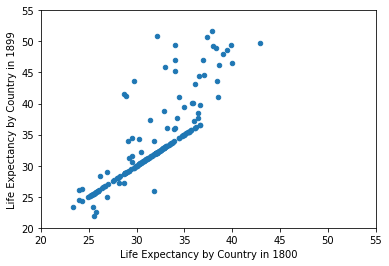

In [40]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
import pandas as pd
g1800s = pd.read_csv('gapminder.csv')
# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()


In [43]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[-1] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


AssertionError: 

In [47]:
#incase you wanna concat
# Concatenate the DataFrames row-wise
#gapminder = pd.concat([g1800s, g1900s, g2000s])

print(g1800s.shape)

# Print the head of gapminder
print(g1800s.head())



(780, 219)
   Unnamed: 0   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0           0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1           1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13   
2           2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4           4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN           

In [ ]:
## applying principles of tidy data
# 1 row form observations
# 2 columns form variables

# melting turns columns into rows
# pivoting takes unique values and convert them into new columns

#checking after that with dtypes
# eg - df.dtypes
df['column'] = df['column'].to_numeric()
df['column'] = df['column'].astype(str)

#additional calculations & saving your data
df['newcolumn'] = df.apply(my_function,axis=1) # axis 1 for row wise

# if we want to write our data into another file
df.to_csv('mydata.csv')


In [68]:
# Melt gapminder: gapminder_melt

g1800s_melt = pd.melt(g1800s.iloc[:,1:], id_vars='Life expectancy')


# Rename the columns
g1800s_melt.columns = ['country','year','life_expectancy']

# Print the head of gapminder_melt
print(g1800s.columns)
print(g1800s_melt.columns)
print(g1800s_melt.head())
print(g1800s_melt.tail())


Index(['Unnamed: 0', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=219)
Index(['country', 'year', 'life_expectancy'], dtype='object')
                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82
            country  year  life_expectancy
169255   Yugoslavia  2016              NaN
169256       Zambia  2016            57.10
169257     Zimbabwe  2016            61.69
169258        Åland  2016              NaN
169259  South Sudan  2016            56.10


#### checking data types
That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64

In [69]:
# Convert the year column to numeric
g1800s_melt.year = pd.to_numeric(g1800s_melt.year)

# Test if country is of type object
assert g1800s_melt.country.dtypes == np.object

# Test if year is of type int64
assert g1800s_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert g1800s_melt.life_expectancy.dtypes == np.float64


In [70]:
####

In [104]:
# Create the series of countries: countries
countries = g1800s_melt.iloc[:,0]

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Z a-z\. \s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


In [105]:
# Assert that country does not contain any missing values
assert pd.notnull(g1800s_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(g1800s_melt.year).all()

# Drop the missing values
gapminder = g1800s_melt.dropna()

# Print the shape of gapminder
print(gapminder.shape)


(43857, 3)


year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


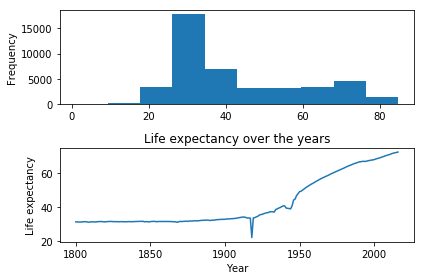

In [106]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')


# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()


# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')
